In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [2]:
# Feedback data with actual categories
feedbacks = [{"source": "Teacher", "feedback": "Kids visited all the spaces.", "category": 3},
    {"source": "Teacher", "feedback": "Kids actively participated in all activities.", "category": 4},
    {"source": "Teacher", "feedback": "Share learning, ideas, experience with others.", "category": 4},
    {"source": "Teacher", "feedback": "Discuss exhibits with others.", "category": 4},
    {"source": "Teacher", "feedback": "Created something to express.", "category": 3},
    {"source": "Teacher", "feedback": "Innovative ideas implemented/shared.", "category": 2},
    {"source": "Teacher", "feedback": "Kids are listening and respondind and excepting each other.", "category": 4},
    {"source": "Teacher", "feedback": "Kids are reflecting and sharing their experience with other.", "category": 4},
    {"source": "Teacher", "feedback": "when climbing they were very nervous.", "category": 1},
    {"source": "Facilitator", "feedback": "Encourage kids to try.", "category": 4},
    {"source": "Facilitator", "feedback": "Kids actively participated in all activities.", "category": 3},
    {"source": "Facilitator", "feedback": "Share learning, ideas, experience with others.", "category": 1},
    {"source": "Facilitator", "feedback": "Discuss exhibits with others.", "category": 2},
    {"source": "Facilitator", "feedback": "Created something to express.", "category": 2},
    {"source": "Facilitator", "feedback": "do not find the cutter.", "category": 1},
    {"source": "Facilitator", "feedback": "Innovative ideas implemented/shared.", "category": 1},
    {"source": "Facilitator", "feedback": "Kids are listening and responding and excepting each other.", "category": 4},
    {"source": "Facilitator", "feedback": "Kids are reflecting and sharing their experience with other.", "category": 3},
    {"source": "M&E", "feedback": "Active Participation.", "category": 3},
    {"source": "M&E", "feedback": "Getting support and feedbacks.", "category": 4},
    {"source": "M&E", "feedback": "Tried again after failing.", "category": 4},
    {"source": "M&E", "feedback": "Making something.", "category": 4},
    {"source": "M&E", "feedback": "Share learning, ideas, experience with others.", "category": 2},
    {"source": "M&E", "feedback": "Interact with exhibits.", "category": 2},
    {"source": "M&E", "feedback": "Celebrate what they did.", "category": 4},
    {"source": "M&E", "feedback": "Reflect and discussed what they did.", "category": 3},
    {"source": "M&E", "feedback": "Some student do not like to climb.", "category": 2}
]

In [3]:
# Category labels
category_labels = {
    0: 'Nobody',
    1: 'V few',
    2: 'Half',
    3: 'Most',
    4: 'All',
    5: 'Not Sure'
}

In [4]:
# Convert feedback data to DataFrame
df = pd.DataFrame(feedbacks)
df

,source,feedback,category
0,Teacher,Kids visited all the spaces.,3
1,Teacher,Kids actively participated in all activities.,4
2,Teacher,"Share learning, ideas, experience with others.",4
3,Teacher,Discuss exhibits with others.,4
4,Teacher,Created something to express.,3
5,Teacher,Innovative ideas implemented/shared.,2
6,Teacher,Kids are listening and respondind and exceptin...,4
7,Teacher,Kids are reflecting and sharing their experien...,4
8,Teacher,when climbing they were very nervous.,1
9,Facilitator,Encourage kids to try.,4


In [5]:
# Map actual categories to category labels
df['category_label'] = df['category'].map(category_labels)
df['category_label']

0      Most
1       All
2       All
3       All
4      Most
5      Half
6       All
7       All
8     V few
9       All
10     Most
11    V few
12     Half
13     Half
14    V few
15    V few
16      All
17     Most
18     Most
19      All
20      All
21      All
22     Half
23     Half
24      All
25     Most
26     Half
Name: category_label, dtype: object

In [6]:
# Define positive and negative words
positive_words = set(['share', 'active', 'participate', 'ideas', 'innovative', 'learning', 'create', 'discuss', 'reflective', 
                      'listening', 'express', 'regular', 'experience', 'celebrate', 'making', 'encourage'])
negative_words = set(['do not find', 'do not like', 'very nervous', 'low self-confidence'])

In [7]:
# Define sentiment analysis function
def sentiment_analysis(text):
    tokens = word_tokenize(text.lower())  # Convert to lower case and tokenize
    positive_count = sum(1 for word in tokens if word in positive_words)
    negative_count = sum(1 for word in tokens if word in negative_words)
    if positive_count > negative_count:
        return 'Positive'
    elif negative_count > positive_count:
        return 'Negative'
    else:
        return 'Neutral'


In [8]:
# Apply sentiment analysis to each feedback
df['sentiment'] = df['feedback'].apply(sentiment_analysis)
df['sentiment']

0      Neutral
1      Neutral
2     Positive
3     Positive
4     Positive
5     Positive
6     Positive
7     Positive
8      Neutral
9     Positive
10     Neutral
11    Positive
12    Positive
13    Positive
14     Neutral
15    Positive
16    Positive
17    Positive
18    Positive
19     Neutral
20     Neutral
21    Positive
22    Positive
23     Neutral
24    Positive
25     Neutral
26     Neutral
Name: sentiment, dtype: object

In [9]:
# Save to CSV
df.to_csv('Dharohar_feedback.csv', index=False)

In [10]:
df

,source,feedback,category,category_label,sentiment
0,Teacher,Kids visited all the spaces.,3,Most,Neutral
1,Teacher,Kids actively participated in all activities.,4,All,Neutral
2,Teacher,"Share learning, ideas, experience with others.",4,All,Positive
3,Teacher,Discuss exhibits with others.,4,All,Positive
4,Teacher,Created something to express.,3,Most,Positive
5,Teacher,Innovative ideas implemented/shared.,2,Half,Positive
6,Teacher,Kids are listening and respondind and exceptin...,4,All,Positive
7,Teacher,Kids are reflecting and sharing their experien...,4,All,Positive
8,Teacher,when climbing they were very nervous.,1,V few,Neutral
9,Facilitator,Encourage kids to try.,4,All,Positive


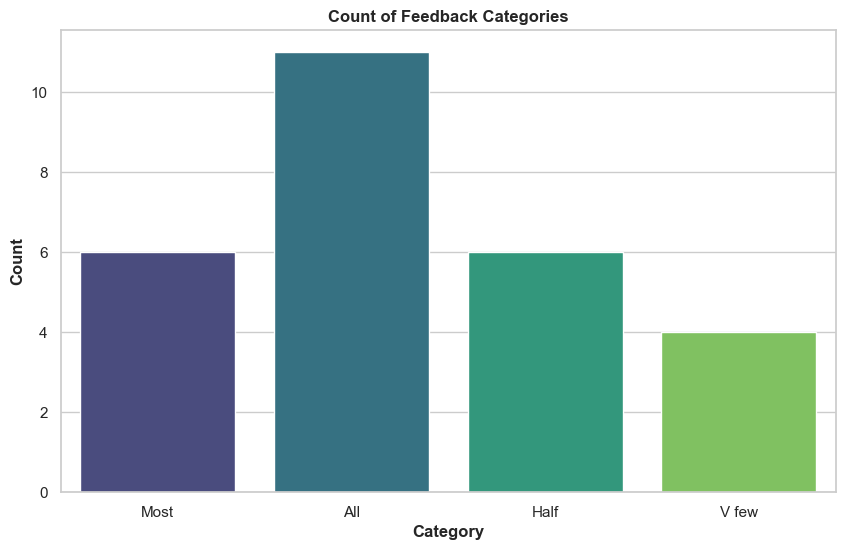

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.DataFrame(df)

# Set plot style
sns.set(style="whitegrid")

# Bar plot: Count of feedback categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='category_label', palette='viridis')
plt.title('Count of Feedback Categories', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

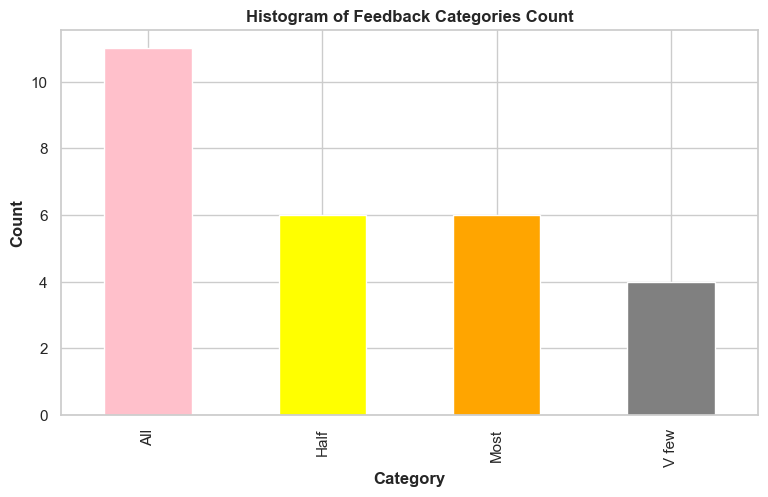

In [12]:
plt.figure(figsize=(9, 5))
df['category_label'].value_counts().sort_index().plot(kind='bar', color=['pink', 'yellow', 'orange', 'gray', 'indigo', 'purple'])
plt.title('Histogram of Feedback Categories Count', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()


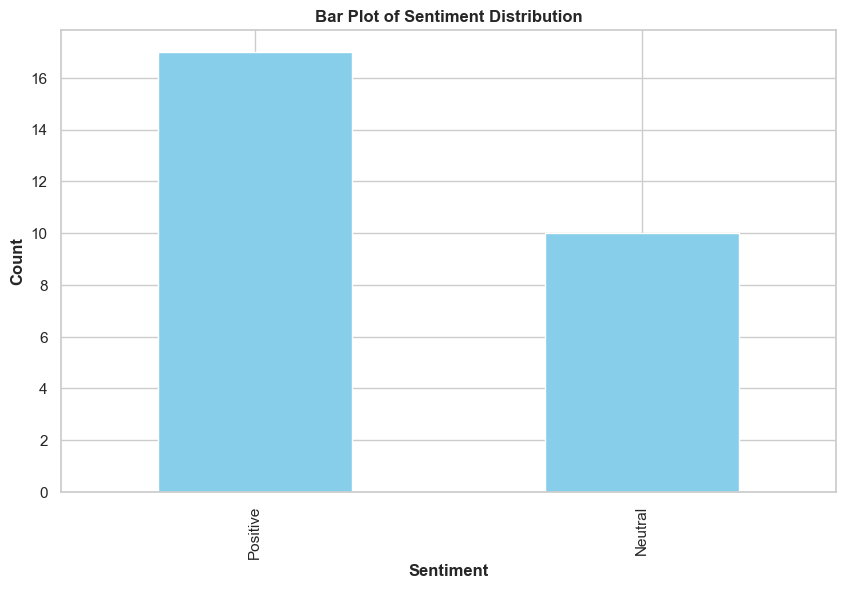

In [13]:
# Plotting a bar plot of sentiment distribution
plt.figure(figsize=(10, 6))
df['sentiment'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Bar Plot of Sentiment Distribution', fontweight='bold')
plt.xlabel('Sentiment', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()

<Figure size 1000x600 with 0 Axes>

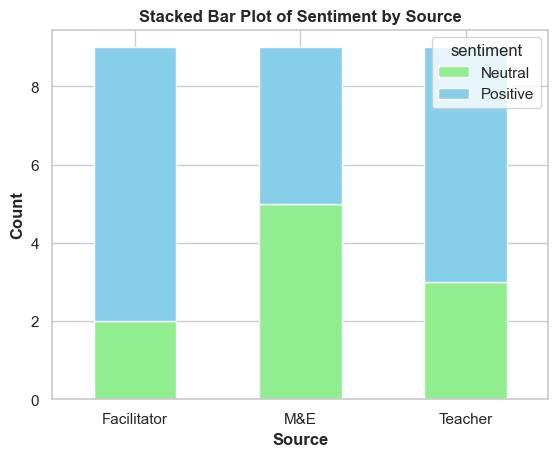

In [14]:
# Plotting a stacked bar plot of sentiment by source
plt.figure(figsize=(10, 6))
sentiment_by_source = df.groupby(['source', 'sentiment']).size().unstack().fillna(0)
sentiment_by_source.plot(kind='bar', stacked=True, color=['lightgreen', 'skyblue', 'lightgray'])
plt.title('Stacked Bar Plot of Sentiment by Source', fontweight='bold')
plt.xlabel('Source', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

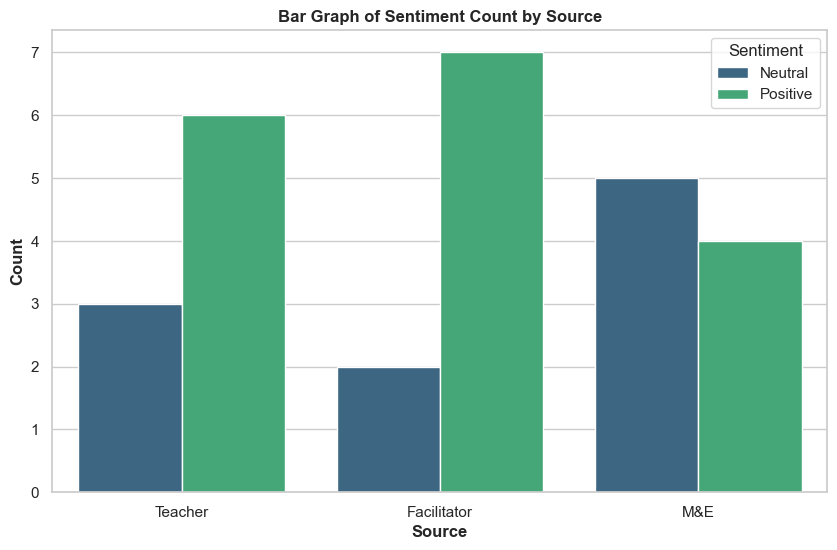

In [15]:
# Bar graph of sentiment count by source
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='source', hue='sentiment', palette='viridis')
plt.title('Bar Graph of Sentiment Count by Source', fontweight='bold')
plt.xlabel('Source', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(title='Sentiment')
plt.show()


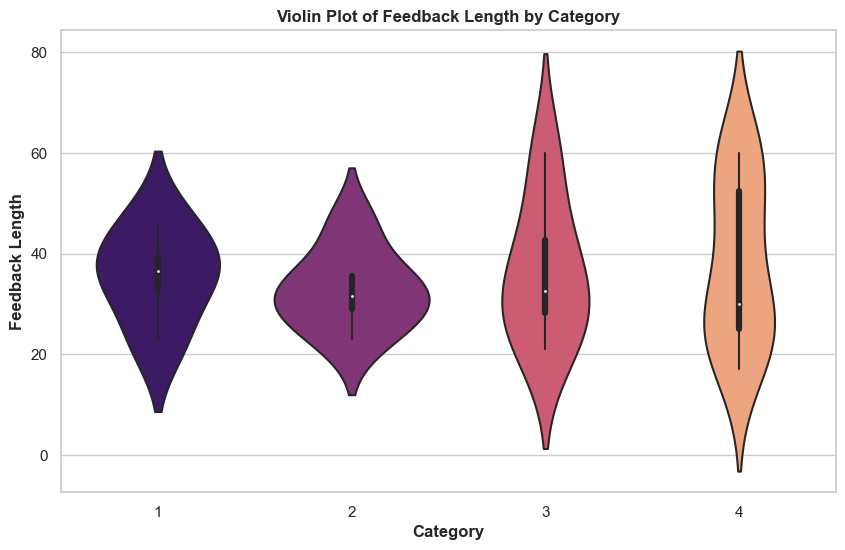

In [16]:
# Box plot of feedback length by category
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='category', y=df['feedback'].apply(len), palette='magma')
plt.title('Violin Plot of Feedback Length by Category', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Feedback Length', fontweight='bold')
plt.show()

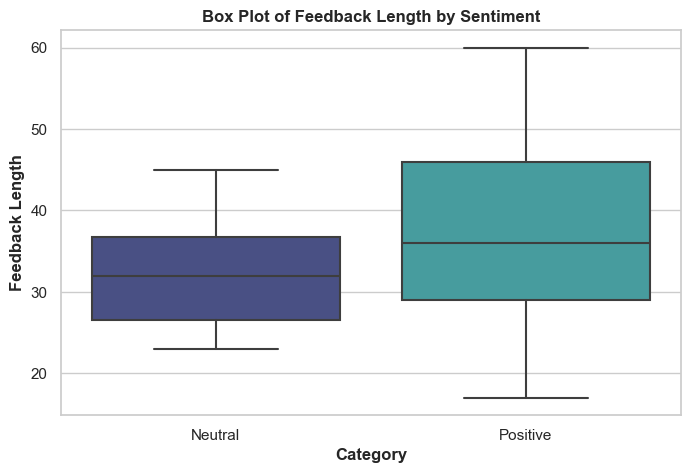

In [17]:
# Calculate feedback lengths and add to DataFrame
df['Feedback Length'] = df['feedback'].apply(len)

# Set plot style
sns.set(style="whitegrid")

# Box plot of feedback length by category with overlayed data points
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='sentiment', y='Feedback Length', palette='mako')
plt.title('Box Plot of Feedback Length by Sentiment', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Feedback Length', fontweight='bold')
plt.show()


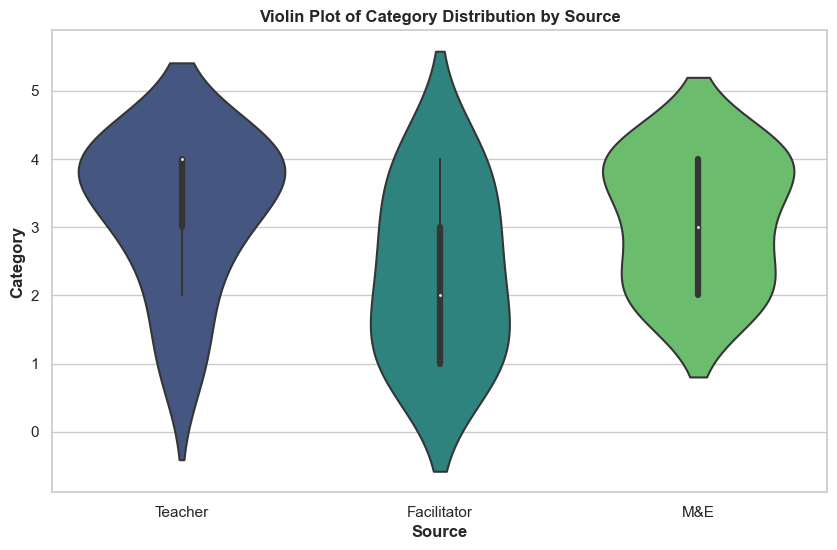

In [18]:
# Box Plot of Category Distribution by Source
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='source', y='category', palette='viridis')
plt.title('Violin Plot of Category Distribution by Source', fontweight='bold')
plt.xlabel('Source', fontweight='bold')
plt.ylabel('Category', fontweight='bold')
plt.xticks(rotation=0)
plt.show()

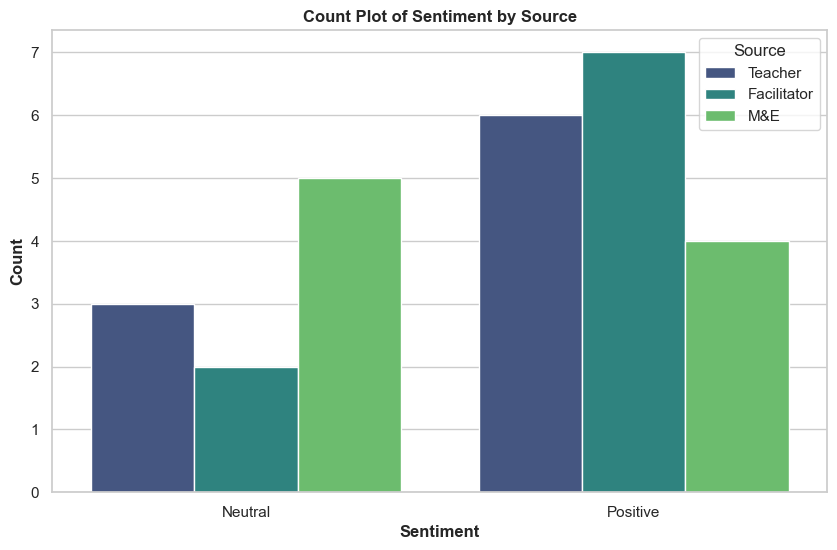

In [19]:
# Count Plot of Sentiment by Source
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='sentiment', hue='source', palette='viridis')
plt.title('Count Plot of Sentiment by Source', fontweight='bold')
plt.xlabel('Sentiment', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=0)
plt.legend(title='Source')
plt.show()

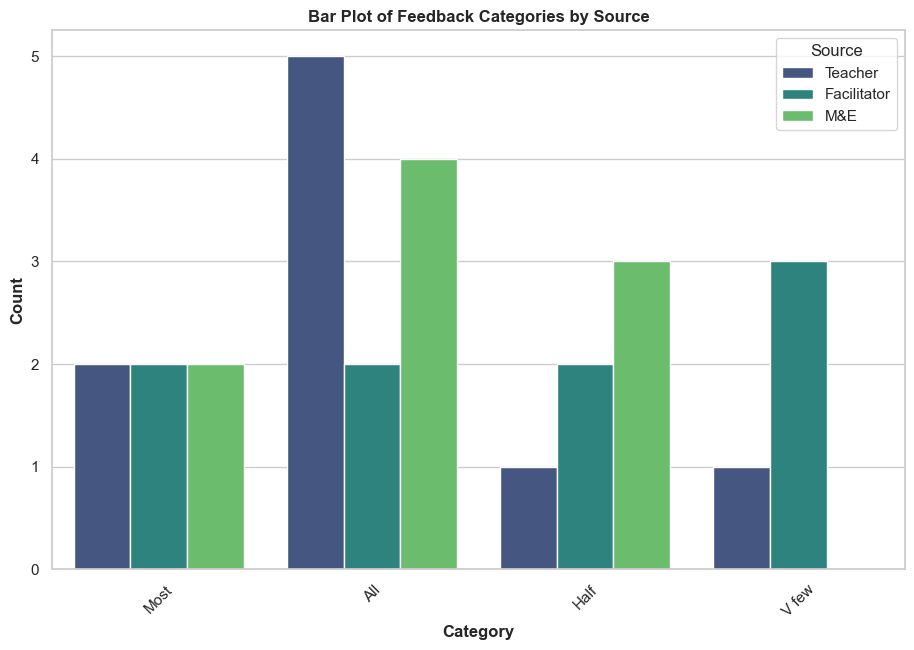

In [20]:
# Bar Plot of Feedback Categories by Source
plt.figure(figsize=(11, 7))
sns.countplot(data=df, x='category_label', hue='source', palette='viridis')
plt.title('Bar Plot of Feedback Categories by Source', fontweight='bold')
plt.xlabel('Category', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Source')
plt.show()

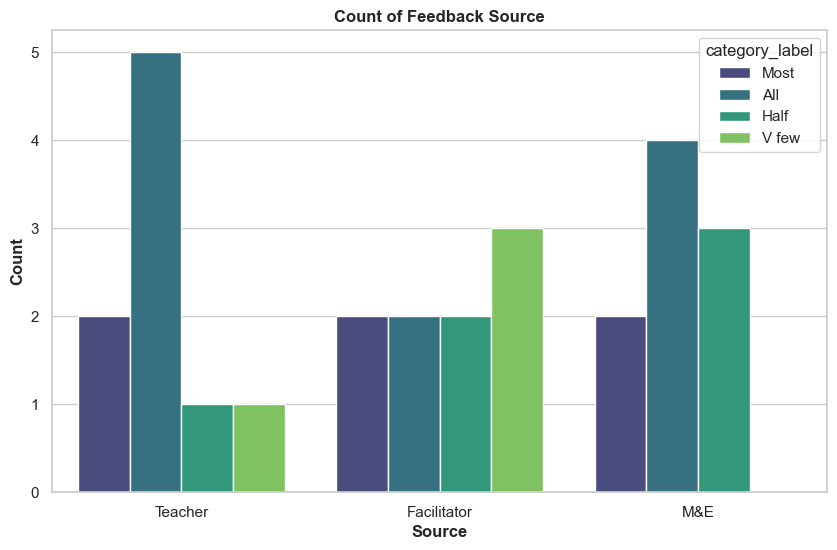

In [21]:
sns.set(style="whitegrid")

# Bar plot: Count of feedback categories
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='source', palette='viridis', hue='category_label')
plt.title('Count of Feedback Source', fontweight='bold')
plt.xlabel('Source', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.show()